<a href="https://colab.research.google.com/github/KevinGJ23/Inteligencia_Artificial/blob/main/Proyecto/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXTRAER LOS DATOS DE KAGGLE

In [1]:
import os
# siempre colocar el kaggle.json en el colab
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/

In [2]:
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia
# ESTE ES EL LINK QUE APARECE DEBAJO DEL DATASET DEL KAGGLE

In [4]:
!unzip /content/udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip

Archive:  /content/udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


# COMIENZO PROYECTO

In [98]:
# Importamos librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### CARGA DE DATOS

In [99]:
file_path = "/content/train.csv"  # Asegúrate de que este archivo exista en la ruta especificada
data_train = pd.read_csv(file_path, index_col="ID")
print("✅ Datos cargados correctamente")
data_train.head()

✅ Datos cargados correctamente


,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
ID,,,,,,,,,,,,,,,,,,,,
904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


### INSPECCIÓN GENERAL DEL DATAFRAME

In [100]:
# Mostrar dimensiones del dataset
print(f"""DIMENSIONES DEL DATAFRAME:
Filas:     {data_train.shape[0]}
Columnas:  {data_train.shape[1]}\n""")

# Mostrar nombres de columnas
print("COLUMNAS DEL DATAFRAME")
for column in data_train.columns:
    print(f"- {column}")

# Estadísticas descriptivas numéricas
print("\nESTADISTICAS DESCRIPTIVAS:")
display(data_train.describe().T)  # Transpuesta para mejor lectura


DIMENSIONES DEL DATAFRAME: 
Filas:     692500
Columnas:  20

COLUMNAS DEL DATAFRAME
- PERIODO
- ESTU_PRGM_ACADEMICO
- ESTU_PRGM_DEPARTAMENTO
- ESTU_VALORMATRICULAUNIVERSIDAD
- ESTU_HORASSEMANATRABAJA
- FAMI_ESTRATOVIVIENDA
- FAMI_TIENEINTERNET
- FAMI_EDUCACIONPADRE
- FAMI_TIENELAVADORA
- FAMI_TIENEAUTOMOVIL
- ESTU_PRIVADO_LIBERTAD
- ESTU_PAGOMATRICULAPROPIO
- FAMI_TIENECOMPUTADOR
- FAMI_TIENEINTERNET.1
- FAMI_EDUCACIONMADRE
- RENDIMIENTO_GLOBAL
- coef_1
- coef_2
- coef_3
- coef_4

ESTADISTICAS DESCRIPTIVAS:


,count,mean,std,min,25%,50%,75%,max
PERIODO,692500.0,20198.366679,10.535037,20183.0,20195.000,20195.000,20203.000,20213.000
coef_1,692500.0,0.268629,0.122130,0.0,0.203,0.240,0.314,0.657
coef_2,692500.0,0.259996,0.093480,0.0,0.212,0.271,0.309,0.487
coef_3,692500.0,0.262087,0.058862,0.0,0.254,0.276,0.293,0.320
coef_4,692500.0,0.262903,0.067944,0.0,0.255,0.285,0.303,0.332


In [101]:
# Información general del dataset
print("Información General:")
data_train.info()

Información General:
<class 'pandas.core.frame.DataFrame'>
Index: 692500 entries, 904256 to 933374
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   PERIODO                         692500 non-null  int64  
 1   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 2   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 3   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 4   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 5   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 6   FAMI_TIENEINTERNET              665871 non-null  object 
 7   FAMI_EDUCACIONPADRE             669322 non-null  object 
 8   FAMI_TIENELAVADORA              652727 non-null  object 
 9   FAMI_TIENEAUTOMOVIL             648877 non-null  object 
 10  ESTU_PRIVADO_LIBERTAD           692500 non-null  object 
 11  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object 


In [102]:
# Miramos datos faltantes
data_nan = data_train.isna().sum()
data_nan=data_nan[data_nan!=0]

# Obtener la cantidad de valores no nulos (frecuencia)
frecuencias = data_train.isna().sum()
frecuencias = frecuencias[data_nan.index]  # Solo para columnas con nulos

# Crear el DataFrame combinado
df_nulos = pd.DataFrame({
    'Columna Categórica': data_nan.index,
    'Frecuencia': frecuencias.values,
    'Total Nulos': data_nan.values
})

# Estilo personalizado
def estilo_categoricas(df, col_num, col_categorica):
    # Aplicar hide_index antes de aplicar los estilos
    styled_df = df.style.hide(axis="index")

    # Aplicar estilos personalizados al DataFrame
    styled_df = styled_df.set_caption("COLUMNAS CATEGÓRICAS")\
        .set_table_styles([
            {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '12pt'), ('font-weight', 'bold'), ('text-align', 'left')]},  # Alinear el título
            {'selector': f'th.{col_num}', 'props': [('background-color', '#A8D08D'), ('color', 'black'), ('text-align', 'left')]},  # Alinear título de la columna de número
            {'selector': f'th.{col_categorica}', 'props': [('background-color', '#F4B084'), ('color', 'black'), ('text-align', 'left')]},  # Alinear título de la columna categórica
            {'selector': 'td', 'props': [('text-align', 'left')]}  # Alinear el contenido de todas las celdas a la izquierda
        ])\
        .applymap(lambda _: 'background-color: #EBF1DE', subset=[col_num])\
        .applymap(lambda _: 'background-color: #FCE4D6', subset=[col_categorica])

    return styled_df

# Mostrar con estilo
display(estilo_categoricas(df_nulos, 'Columna Categórica', 'Frecuencia'))

Columna Categórica,Frecuencia,Total Nulos
ESTU_VALORMATRICULAUNIVERSIDAD,6287,6287
ESTU_HORASSEMANATRABAJA,30857,30857
FAMI_ESTRATOVIVIENDA,32137,32137
FAMI_TIENEINTERNET,26629,26629
FAMI_EDUCACIONPADRE,23178,23178
FAMI_TIENELAVADORA,39773,39773
FAMI_TIENEAUTOMOVIL,43623,43623
ESTU_PAGOMATRICULAPROPIO,6498,6498
FAMI_TIENECOMPUTADOR,38103,38103
FAMI_TIENEINTERNET.1,26629,26629


## Analisis de datos numericos

In [103]:
data_train._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
PERIODO,692500.0,20198.366679,10.535037,20183.0,20195.000,20195.000,20203.000,20213.000
coef_1,692500.0,0.268629,0.122130,0.0,0.203,0.240,0.314,0.657
coef_2,692500.0,0.259996,0.093480,0.0,0.212,0.271,0.309,0.487
coef_3,692500.0,0.262087,0.058862,0.0,0.254,0.276,0.293,0.320
coef_4,692500.0,0.262903,0.067944,0.0,0.255,0.285,0.303,0.332


### Relación entre Variables Numéricas

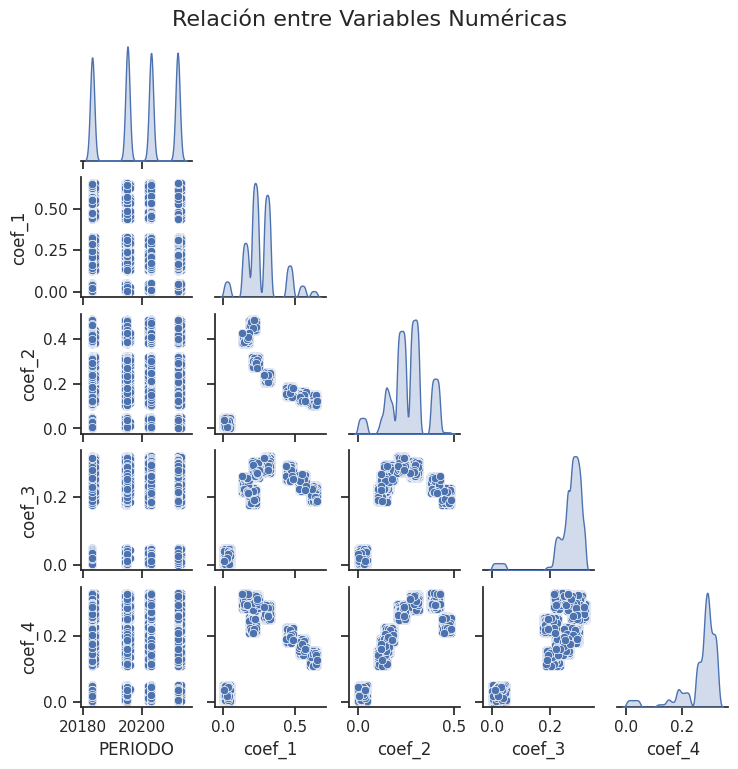

In [104]:
cols = ['PERIODO', 'coef_1', 'coef_2', 'coef_3', 'coef_4']

sns.set(style="ticks")
sns.pairplot(data=data_train[cols],
             height=1.5,
             diag_kind='kde', #nos ayuda a ver si es normal la distribucion
             corner=True)

plt.suptitle("Relación entre Variables Numéricas", fontsize=16, y=1.02)
plt.show()

### Distribución de Variables

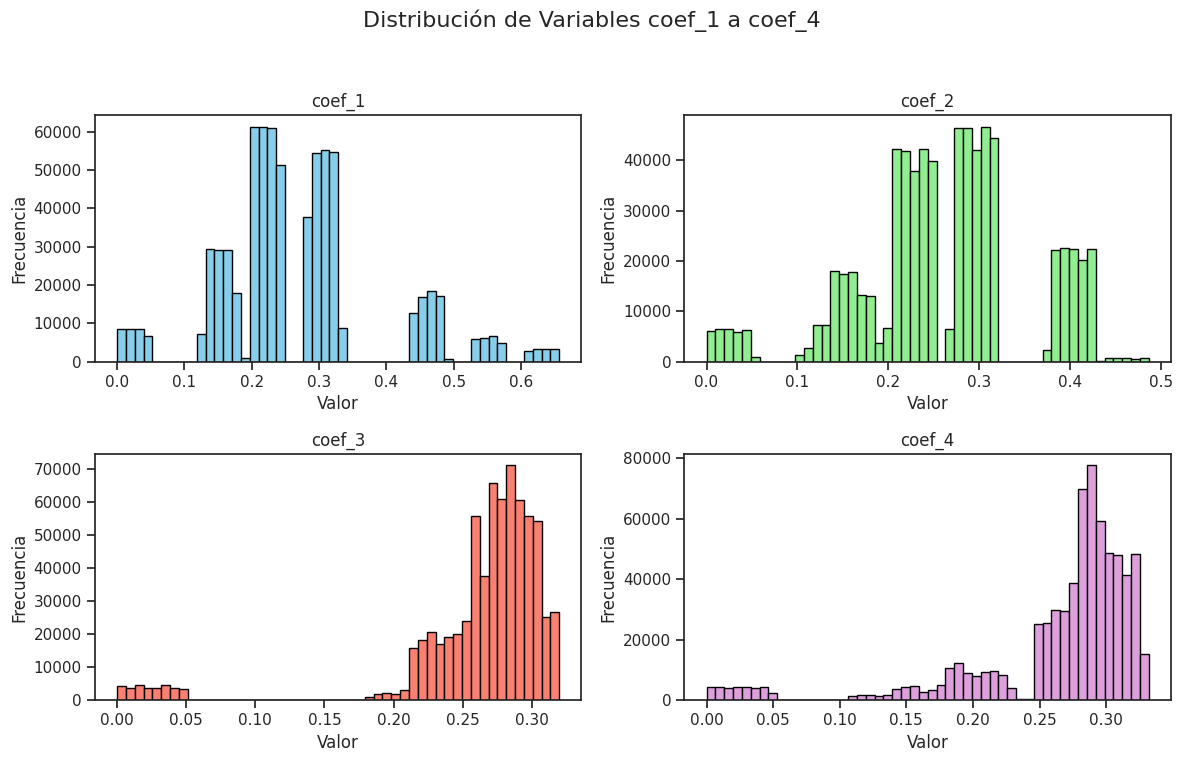

In [105]:
cof1 = data_train['coef_1']
cof2 = data_train['coef_2']
cof3 = data_train['coef_3']
cof4 = data_train['coef_4']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Distribución de Variables coef_1 a coef_4", fontsize=16)

axs[0, 0].hist(cof1, bins=50, color='skyblue', edgecolor='black')
axs[0, 0].set_title('coef_1')
axs[0, 0].set_xlabel('Valor')
axs[0, 0].set_ylabel('Frecuencia')

axs[0, 1].hist(cof2, bins=50, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('coef_2')
axs[0, 1].set_xlabel('Valor')
axs[0, 1].set_ylabel('Frecuencia')

axs[1, 0].hist(cof3, bins=50, color='salmon', edgecolor='black')
axs[1, 0].set_title('coef_3')
axs[1, 0].set_xlabel('Valor')
axs[1, 0].set_ylabel('Frecuencia')

axs[1, 1].hist(cof4, bins=50, color='plum', edgecolor='black')
axs[1, 1].set_title('coef_4')
axs[1, 1].set_xlabel('Valor')
axs[1, 1].set_ylabel('Frecuencia')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Analisis datos catagericos


In [120]:
import pandas as pd
import warnings # Import the warnings module

# Obtener columnas categóricas
columns_categorical = [i for i in data_train.columns if i not in data_train._get_numeric_data().columns]

# Crear DataFrame
df_categoricas = pd.DataFrame({
    "N°": range(1, len(columns_categorical) + 1),
    "COLUMNA CATEGORICA": columns_categorical
})
# Mostrar (en Jupyter)
estilo_categoricas(df_categoricas,"N°","COLUMNA CATEGORICA")

N°,COLUMNA CATEGORICA
1,ESTU_PRGM_ACADEMICO
2,ESTU_PRGM_DEPARTAMENTO
3,ESTU_VALORMATRICULAUNIVERSIDAD
4,ESTU_HORASSEMANATRABAJA
5,FAMI_ESTRATOVIVIENDA
6,FAMI_TIENEINTERNET
7,FAMI_EDUCACIONPADRE
8,FAMI_TIENELAVADORA
9,FAMI_TIENEAUTOMOVIL
10,ESTU_PRIVADO_LIBERTAD


### Obtención de valores únicos no nulos por columna categórica

In [107]:
list_uniques_values = [np.unique(data_train[i].dropna()) for i in columns_categorical]

### Verificamos valores obtenidos con un columna especifica


In [108]:
print(f'numero de categorias en "ESTU_PRGM_ACADEMICO": {len(list_uniques_values[0])}\n')

# Contar los valores de la columna 'ESTU_PRGM_ACADEMICO'
column = "ESTU_PRGM_ACADEMICO"
values_column1 = data_train[column].value_counts()

print(f"RECTIFICAR LA SUMA: {values_column1.sum()}\n")
# Crear DataFrame con los valores de la columna y su frecuencia
df_categoricas_styled = values_column1.reset_index() # Change the variable name to avoid overwriting
df_categoricas_styled.columns = [column, 'Frecuencia']  # Renombrar las columnas

# Imprimir el total de valores NULOS
print(f'N° total de valores NULOS en "{column}": {data_train[column].isna().sum()}\n')

# Apply the style to df_categoricas_styled (using the new variable name)
estilo_categoricas(df_categoricas_styled,column, 'Frecuencia')


numero de categorias en "ESTU_PRGM_ACADEMICO": 948

RECTIFICAR LA SUMA: 692500

N° total de valores NULOS en "ESTU_PRGM_ACADEMICO": 0



ESTU_PRGM_ACADEMICO,Frecuencia
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
ADMINISTRACIÓN DE EMPRESAS,24777
INGENIERIA CIVIL,19487
MEDICINA,18099
PSICOLOGÍA,17377
INGENIERIA DE SISTEMAS,17150


In [109]:
print(f'numero de categorias en "ESTU_PRGM_DEPARTAMENTO": {len(list_uniques_values[1])}\n')

column="ESTU_PRGM_DEPARTAMENTO"
values_column1=data_train[column].value_counts()

print(f'\nRECTIFICAR LA SUMA: {values_column1.sum()}\n')

# Crear DataFrame con los valores de la columna y su frecuencia
df_categoricas_styled = values_column1.reset_index() # Change the variable name to avoid overwriting
df_categoricas_styled.columns = [column, 'Frecuencia']  # Renombrar las columnas

# Imprimir el total de valores NULOS
print(f'N° total de valores NULOS en "{column}": {data_train[column].isna().sum()}\n')

# Apply the style to df_categoricas_styled (using the new variable name)
estilo_categoricas(df_categoricas_styled,column, 'Frecuencia')




numero de categorias en "ESTU_PRGM_DEPARTAMENTO": 31


RECTIFICAR LA SUMA: 692500

N° total de valores NULOS en "ESTU_PRGM_DEPARTAMENTO": 0



ESTU_PRGM_DEPARTAMENTO,Frecuencia
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018
NARIÑO,13454


In [110]:
for i in range(2, len(columns_categorical)):
    column = columns_categorical[i]
    values_column = data_train[column].value_counts()

    print(f'\nNúmero de categorías en "{column}": {len(list_uniques_values[i])}\n')
    print(f'RECTIFICAR LA SUMA: {values_column.sum()}\n')
    print(f'N° total de valores NULOS en "{column}": {data_train[column].isna().sum()}\n')

    # Crear DataFrame con los valores de la columna y su frecuencia
    df_categoricas_styled = values_column.reset_index()
    df_categoricas_styled.columns = [column, 'Frecuencia']

    # Aplicar estilo (esto devuelve un Styler, puedes mostrarlo en notebooks con display())
    display(estilo_categoricas(df_categoricas_styled, column, 'Frecuencia'))



Número de categorías en "ESTU_VALORMATRICULAUNIVERSIDAD": 8

RECTIFICAR LA SUMA: 686213

N° total de valores NULOS en "ESTU_VALORMATRICULAUNIVERSIDAD": 6287



ESTU_VALORMATRICULAUNIVERSIDAD,Frecuencia
Entre 1 millón y menos de 2.5 millones,204048
Entre 2.5 millones y menos de 4 millones,127430
Menos de 500 mil,80263
Entre 500 mil y menos de 1 millón,78704
Entre 4 millones y menos de 5.5 millones,69736
Más de 7 millones,68014
Entre 5.5 millones y menos de 7 millones,38490
No pagó matrícula,19528



Número de categorías en "ESTU_HORASSEMANATRABAJA": 5

RECTIFICAR LA SUMA: 661643

N° total de valores NULOS en "ESTU_HORASSEMANATRABAJA": 30857



ESTU_HORASSEMANATRABAJA,Frecuencia
Más de 30 horas,249352
0,116550
Entre 11 y 20 horas,115857
Entre 21 y 30 horas,92693
Menos de 10 horas,87191



Número de categorías en "FAMI_ESTRATOVIVIENDA": 7

RECTIFICAR LA SUMA: 660363

N° total de valores NULOS en "FAMI_ESTRATOVIVIENDA": 32137



FAMI_ESTRATOVIVIENDA,Frecuencia
Estrato 2,232671
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289



Número de categorías en "FAMI_TIENEINTERNET": 2

RECTIFICAR LA SUMA: 665871

N° total de valores NULOS en "FAMI_TIENEINTERNET": 26629



FAMI_TIENEINTERNET,Frecuencia
Si,592514
No,73357



Número de categorías en "FAMI_EDUCACIONPADRE": 12

RECTIFICAR LA SUMA: 669322

N° total de valores NULOS en "FAMI_EDUCACIONPADRE": 23178



FAMI_EDUCACIONPADRE,Frecuencia
Secundaria (Bachillerato) completa,128289
Primaria incompleta,125675
Educación profesional completa,83117
Secundaria (Bachillerato) incompleta,71654
Técnica o tecnológica completa,62995
Primaria completa,55958
Postgrado,44169
Educación profesional incompleta,27084
Técnica o tecnológica incompleta,22552
Ninguno,22008



Número de categorías en "FAMI_TIENELAVADORA": 2

RECTIFICAR LA SUMA: 652727

N° total de valores NULOS en "FAMI_TIENELAVADORA": 39773



FAMI_TIENELAVADORA,Frecuencia
Si,563390
No,89337



Número de categorías en "FAMI_TIENEAUTOMOVIL": 2

RECTIFICAR LA SUMA: 648877

N° total de valores NULOS en "FAMI_TIENEAUTOMOVIL": 43623



FAMI_TIENEAUTOMOVIL,Frecuencia
No,412606
Si,236271



Número de categorías en "ESTU_PRIVADO_LIBERTAD": 2

RECTIFICAR LA SUMA: 692500

N° total de valores NULOS en "ESTU_PRIVADO_LIBERTAD": 0



ESTU_PRIVADO_LIBERTAD,Frecuencia
N,692466
S,34



Número de categorías en "ESTU_PAGOMATRICULAPROPIO": 2

RECTIFICAR LA SUMA: 686002

N° total de valores NULOS en "ESTU_PAGOMATRICULAPROPIO": 6498



ESTU_PAGOMATRICULAPROPIO,Frecuencia
No,382201
Si,303801



Número de categorías en "FAMI_TIENECOMPUTADOR": 2

RECTIFICAR LA SUMA: 654397

N° total de valores NULOS en "FAMI_TIENECOMPUTADOR": 38103



FAMI_TIENECOMPUTADOR,Frecuencia
Si,597670
No,56727



Número de categorías en "FAMI_TIENEINTERNET.1": 2

RECTIFICAR LA SUMA: 665871

N° total de valores NULOS en "FAMI_TIENEINTERNET.1": 26629



FAMI_TIENEINTERNET.1,Frecuencia
Si,592514
No,73357



Número de categorías en "FAMI_EDUCACIONMADRE": 12

RECTIFICAR LA SUMA: 668836

N° total de valores NULOS en "FAMI_EDUCACIONMADRE": 23664



FAMI_EDUCACIONMADRE,Frecuencia
Secundaria (Bachillerato) completa,141744
Primaria incompleta,99420
Técnica o tecnológica completa,89542
Educación profesional completa,85326
Secundaria (Bachillerato) incompleta,81012
Primaria completa,56125
Postgrado,46246
Técnica o tecnológica incompleta,27533
Educación profesional incompleta,22470
Ninguno,14483



Número de categorías en "RENDIMIENTO_GLOBAL": 4

RECTIFICAR LA SUMA: 692500

N° total de valores NULOS en "RENDIMIENTO_GLOBAL": 0



RENDIMIENTO_GLOBAL,Frecuencia
alto,175619
bajo,172987
medio-bajo,172275
medio-alto,171619


### Impresión del número de categorías por cada columna categórica

In [111]:
column = columns_categorical
values_column = len(list_uniques_values)

# Crear DataFrame con las columnas y la cantidad de categorías únicas
df_categoricas_styled = pd.DataFrame({
    'Columna Categórica': columns_categorical,
    'Frecuencia': [len(valores) for valores in list_uniques_values]
})

# Mostrar con estilo
display(estilo_categoricas(df_categoricas_styled, 'Columna Categórica', 'Frecuencia'))





Columna Categórica,Frecuencia
ESTU_PRGM_ACADEMICO,948
ESTU_PRGM_DEPARTAMENTO,31
ESTU_VALORMATRICULAUNIVERSIDAD,8
ESTU_HORASSEMANATRABAJA,5
FAMI_ESTRATOVIVIENDA,7
FAMI_TIENEINTERNET,2
FAMI_EDUCACIONPADRE,12
FAMI_TIENELAVADORA,2
FAMI_TIENEAUTOMOVIL,2
ESTU_PRIVADO_LIBERTAD,2


### finalmente miramos algunas clases graficadas

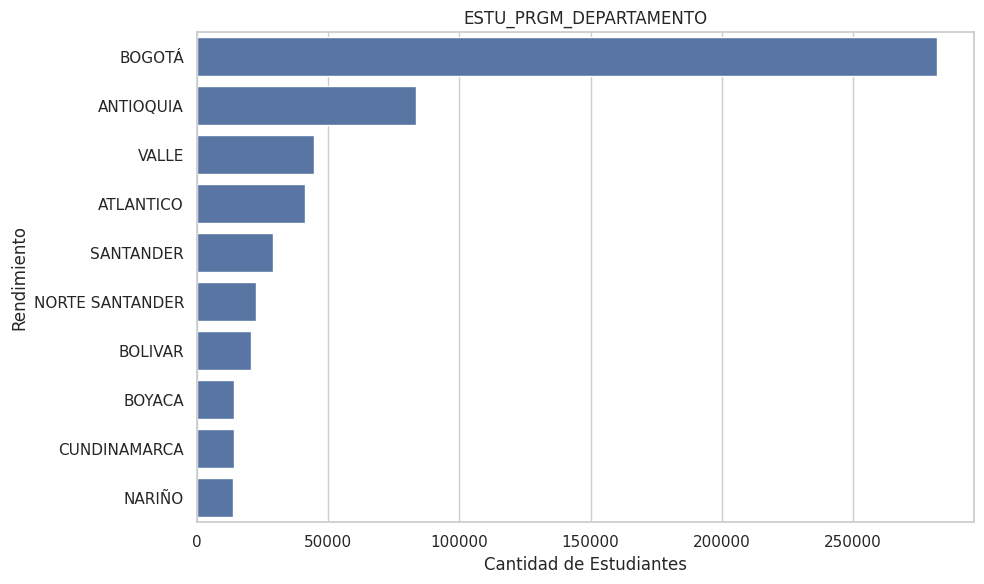

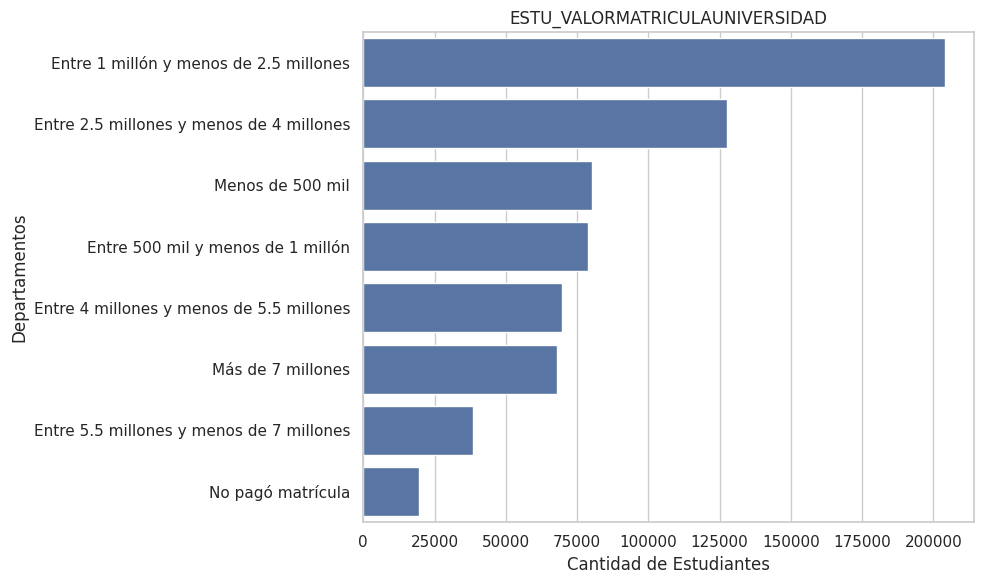

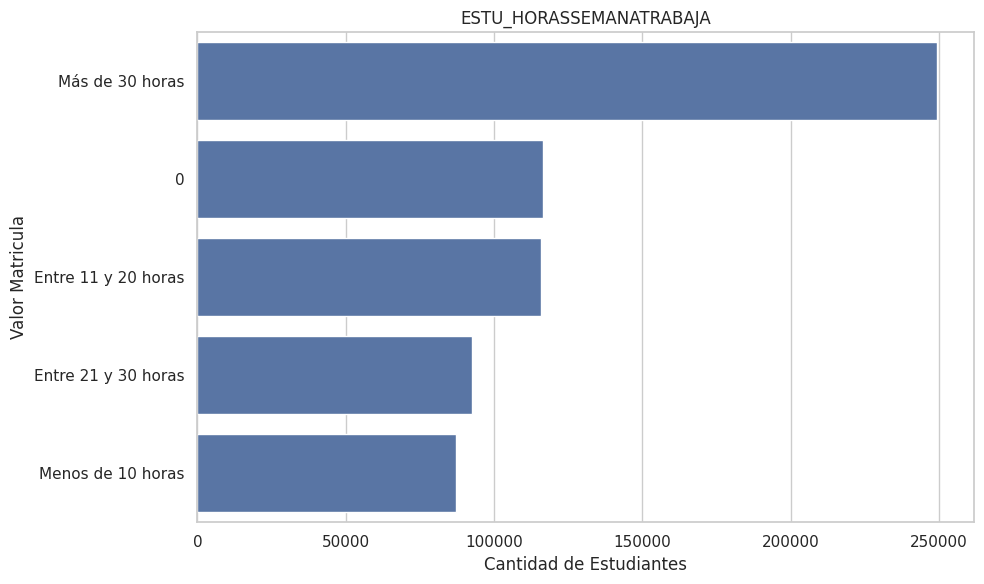

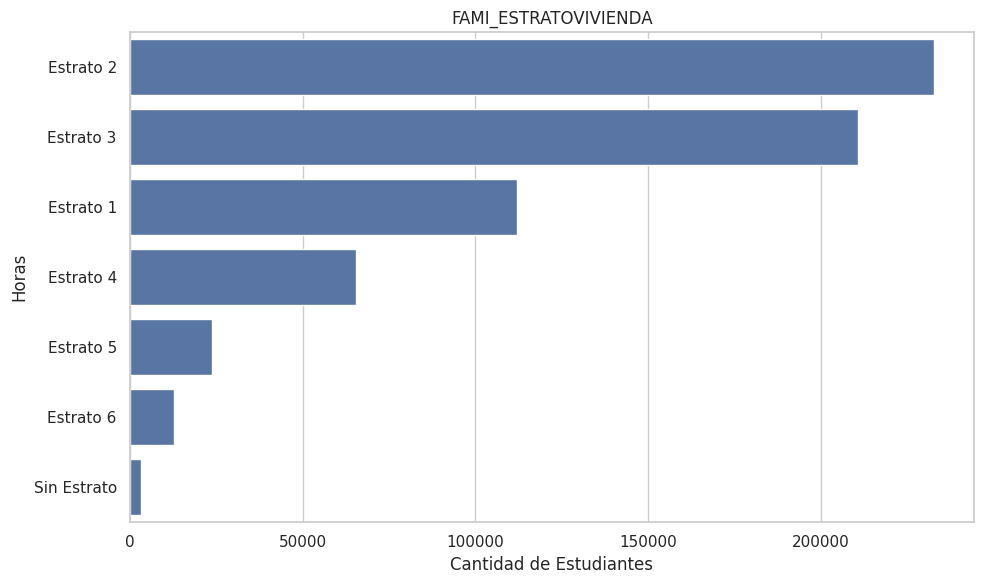

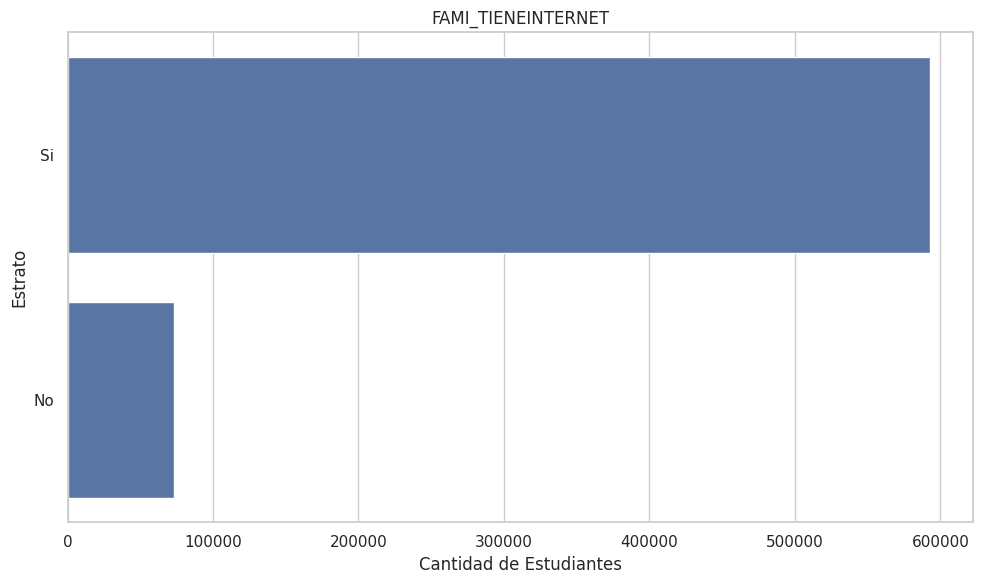

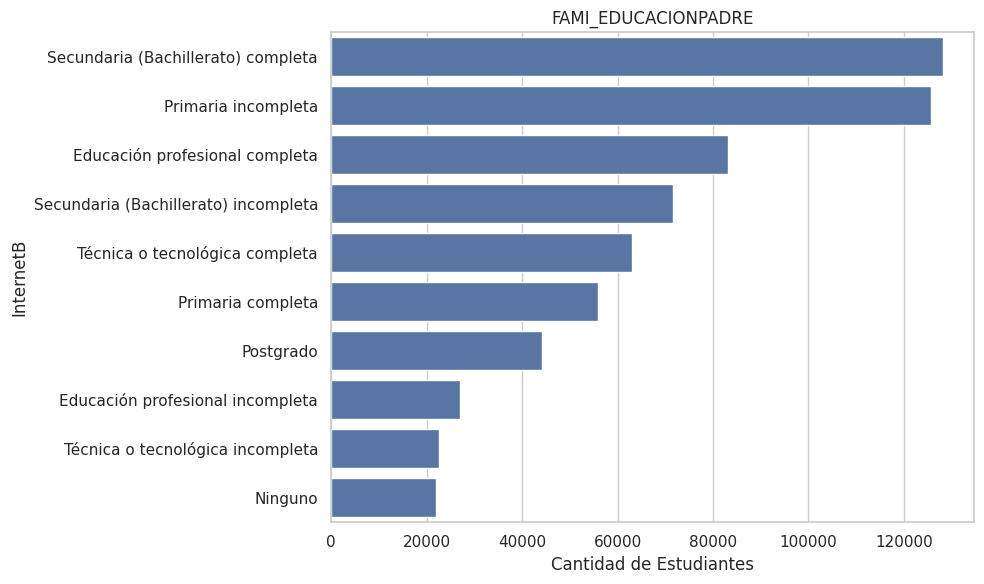

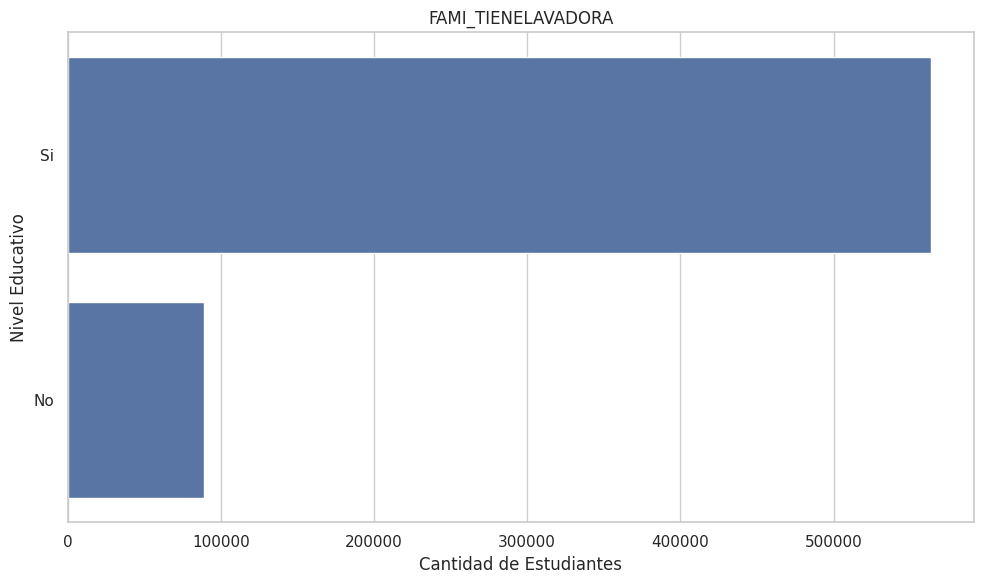

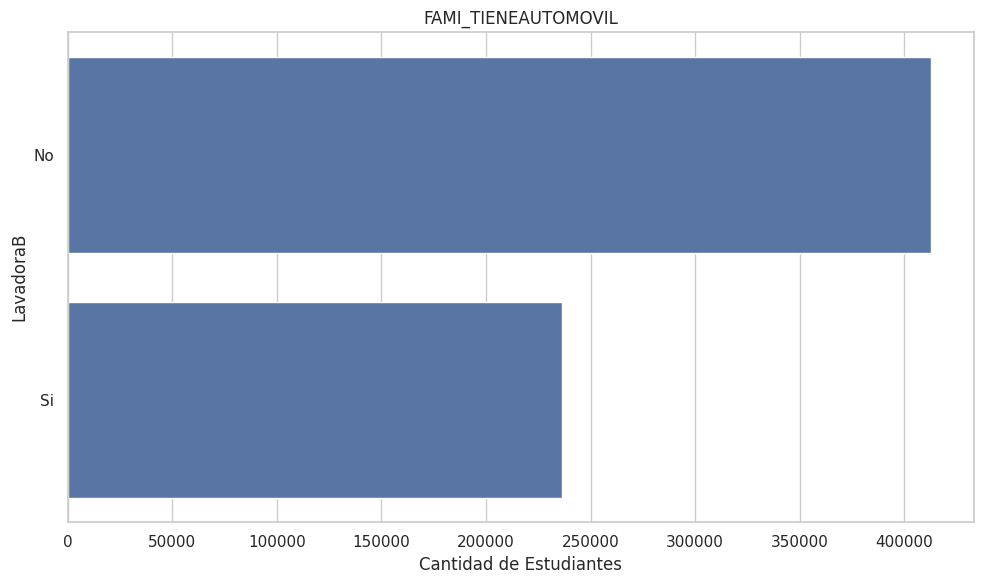

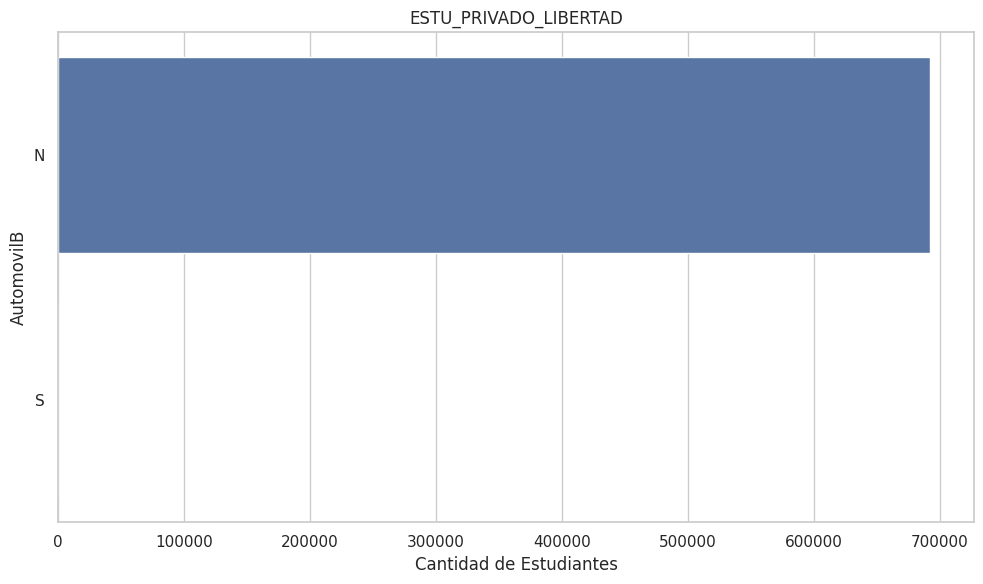

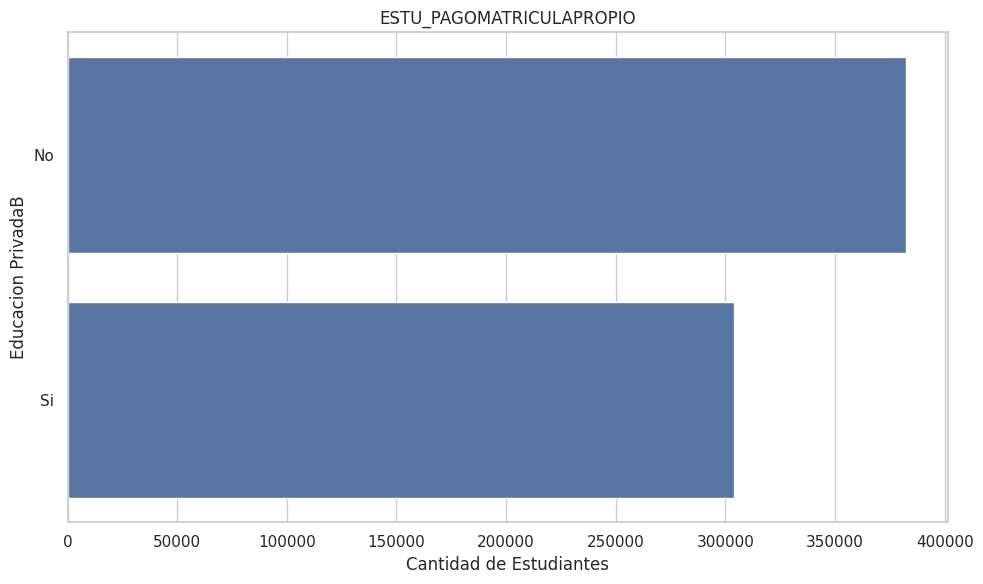

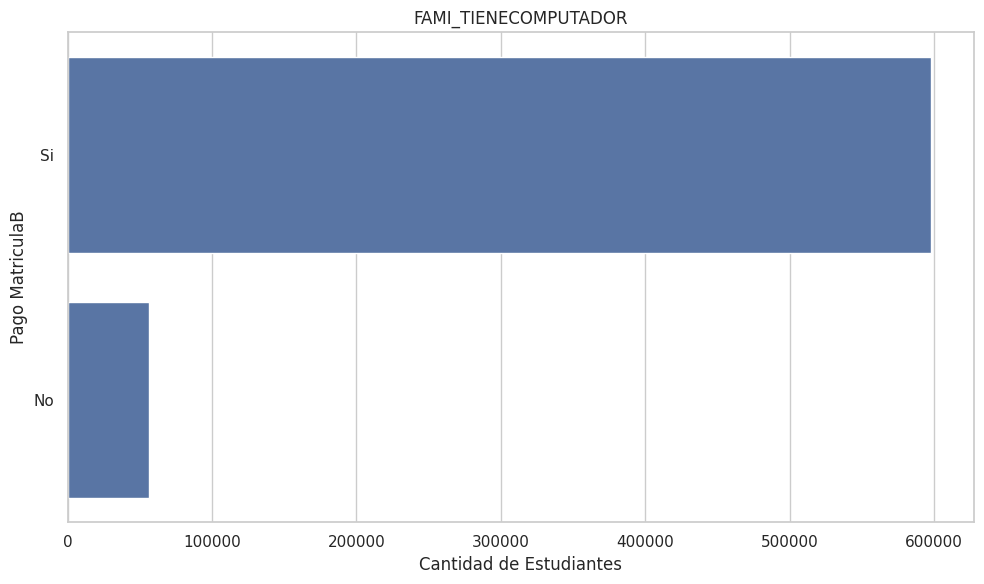

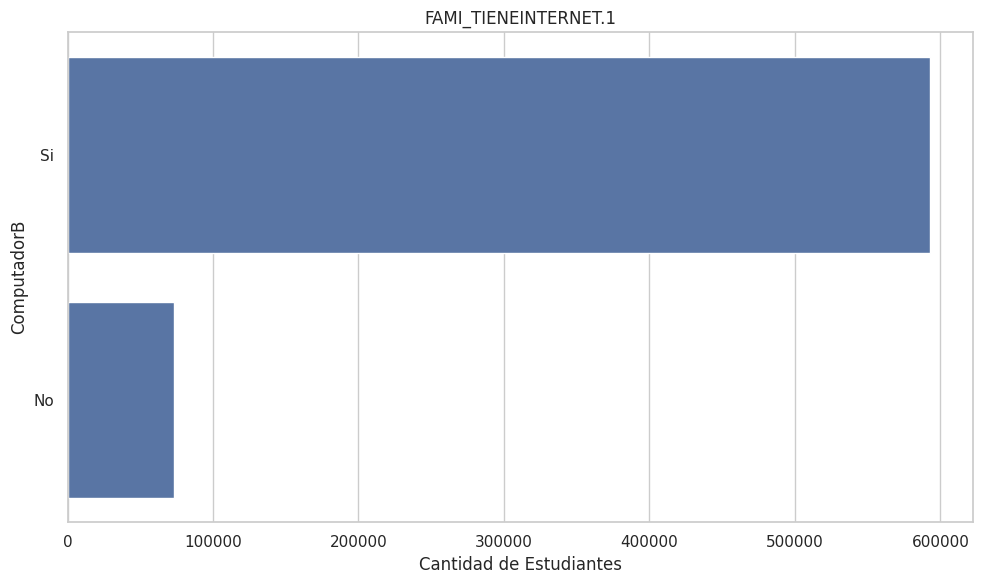

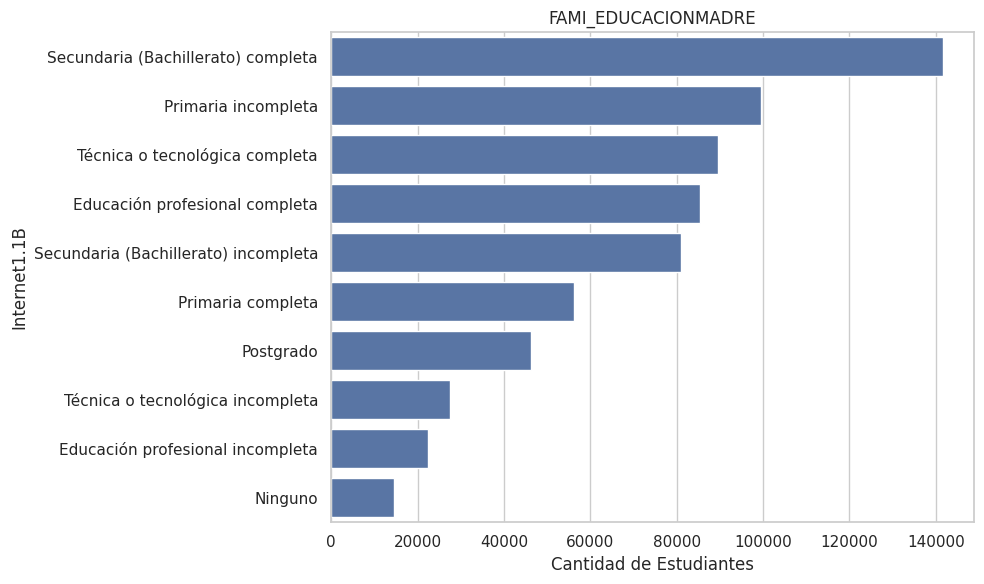

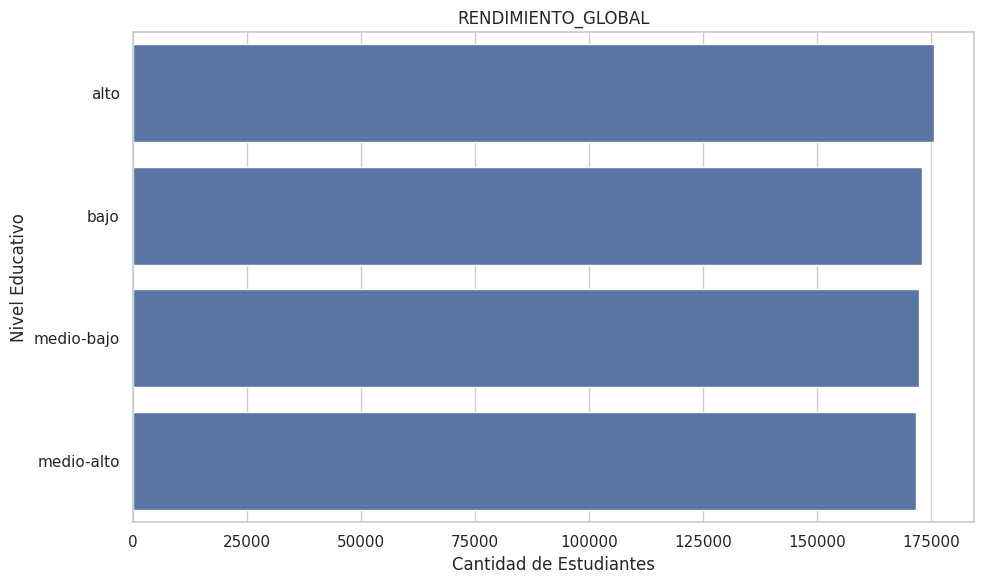

In [119]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
ejey=["Departamentos","Valor Matricula", "Horas","Estrato","InternetB","Nivel Educativo","LavadoraB","AutomovilB","Educacion PrivadaB","Pago MatriculaB","ComputadorB","Internet1.1B","Nivel Educativo", "Rendimiento"]
for i in range(1, len(columns_categorical)):
    column = columns_categorical[i]
    top_values = data_train[column].value_counts().nlargest(10)  # Top 10 categorías más frecuentes

    sns.barplot(x=top_values.values, y=top_values.index)
    plt.title(f"{column}")
    plt.xlabel("Cantidad de Estudiantes")
    plt.ylabel(ejey[i-2])
    plt.tight_layout()
    plt.show()

In [ ]:
sns.histplot(data_train['ESTU_HORASSEMANATRABAJA'].dropna(), bins=30, kde=True)
plt.title("Distribución de Horas de Trabajo Semanales")
plt.xlabel("Horas")
plt.ylabel("Frecuencia")
plt.show()